In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("datatattle/covid-19-nlp-text-classification")

print("Path to dataset files:", path)

100%|██████████| 4.38M/4.38M [00:00<00:00, 108MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/datatattle/covid-19-nlp-text-classification/versions/1


In [28]:
import pandas as pd
df = pd.read_csv('Corona_NLP_test.csv',encoding='latin-1')


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       5000 non-null   int64 
 1   ScreenName     5000 non-null   int64 
 2   Location       3949 non-null   object
 3   TweetAt        5000 non-null   object
 4   OriginalTweet  5000 non-null   object
 5   Sentiment      5000 non-null   object
dtypes: int64(2), object(4)
memory usage: 234.5+ KB


In [26]:
df['OriginalTweet'][7]


'We are working to support our neighbors in need to the best of our ability during the pandemic but we need your help to purchase 37 truckloads of shelf stable food which will be necessary to meet demand Please visit to donate'

In [8]:
df['OriginalTweet'][5]

'@MattHancock @BorisJohnson @10DowningStreet @AWMurrison I am a supermarket worker in a major store, public are not respecting workers by distancing its like were invisible, please go further to protect us as we cant feed a nation if were sick too. #corona'

In [29]:
df.shape

(3798, 6)

In [30]:
df.Sentiment.value_counts(normalize=True)

,proportion
Sentiment,
Negative,0.274092
Positive,0.249342
Neutral,0.162981
Extremely Positive,0.157715
Extremely Negative,0.155872


In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Text Classification
'''
Confusion matrix

precsion / recall / f1-score

auc-roc scores

accuracy

train data or test data

i have build a model having f1-score 0.7 .

'''

'\nConfusion matrix\n\nprecsion / recall / f1-score\n\nauc-roc scores\n\naccuracy\n\ntrain data or test data\n\ni have build a model having f1-score 0.7 .\n\n'

Text(0.5, 1.0, 'Sentiment Distribution')

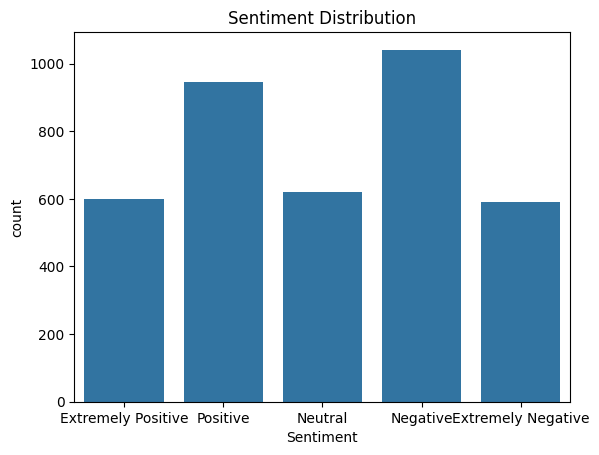

In [32]:


sns.countplot( data=df, x='Sentiment', order = ['Extremely Positive', 'Positive', 'Neutral', 'Negative', 'Extremely Negative'])
plt.title("Sentiment Distribution")

In [33]:
df=df.reset_index(drop=True)

In [34]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.stem import PorterStemmer
import re

stem=PorterStemmer()
corpus = []



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [35]:
corpus1 = []
text = df.OriginalTweet
for i in range(len(text)):

    r = re.sub('[^a-zA-Z]', ' ', text[i])

    r = r.lower()


    corpus1.append(r)


In [36]:
corpus = []
text = df.OriginalTweet
for i in range(len(corpus1)):
    r = corpus1[i].split(" ")
    r = [word for word in r if word not in stopwords.words('english')]
    r = [stem.stem(word) for word in r]
    r = " ".join(r)
    corpus.append(r)


In [37]:
df['text'] = corpus

df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,text
0,1,44953,NYC,02-03-2020,TRENDING: New Yorkers encounter empty supermar...,Extremely Negative,trend new yorker encount empti supermarket sh...
1,2,44954,"Seattle, WA",02-03-2020,When I couldn't find hand sanitizer at Fred Me...,Positive,find hand sanit fred meyer turn amazon ...
2,3,44955,NaN,02-03-2020,Find out how you can protect yourself and love...,Extremely Positive,find protect love one coronaviru
3,4,44956,Chicagoland,02-03-2020,#Panic buying hits #NewYork City as anxious sh...,Negative,panic buy hit newyork citi anxiou shopper st...
4,5,44957,"Melbourne, Victoria",03-03-2020,#toiletpaper #dunnypaper #coronavirus #coronav...,Neutral,toiletpap dunnypap coronaviru coronavirusa...


In [38]:

X = df['text']

y = df['Sentiment']

In [39]:
y

,Sentiment
0,Extremely Negative
1,Positive
2,Extremely Positive
3,Negative
4,Neutral
...,...
3793,Positive
3794,Negative
3795,Neutral
3796,Extremely Negative


In [40]:
from sklearn.preprocessing import LabelEncoder

# Example target column

# Initialize and apply label encoder
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# View encoded labels
print(y_encoded)  # Output: [0, 1, 0, 2]



[0 4 1 ... 3 0 1]


In [41]:
from sklearn.model_selection import train_test_split

# Check class distribution
print(df['Sentiment'].value_counts())  # Print the number of samples in each class

# If a class has only one sample, consider these options:
# 1. Remove the sample:
# df = df[df['Sentiment'] != 'the_class_with_one_sample']  # Replace 'the_class_with_one_sample' with the actual class name

# 2. Collect more data for the under-represented class.

# 3. If removing or collecting more data isn't feasible, you might need to remove the 'stratify' parameter
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=123) # Remove stratify

# After addressing the issue, re-run the train_test_split:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=123, stratify=y)

print('Training Data :', X_train.shape)
print('Testing Data : ', X_test.shape)

Sentiment
Negative              1041
Positive               947
Neutral                619
Extremely Positive     599
Extremely Negative     592
Name: count, dtype: int64
Training Data : (2848,)
Testing Data :  (950,)


In [42]:
y_train.value_counts(normalize=True)


,proportion
Sentiment,
Negative,0.274228
Positive,0.249298
Neutral,0.162921
Extremely Positive,0.157654
Extremely Negative,0.155899


In [43]:
y_test.value_counts(normalize=True)


,proportion
Sentiment,
Negative,0.273684
Positive,0.249474
Neutral,0.163158
Extremely Positive,0.157895
Extremely Negative,0.155789


In [44]:
X_train

,text
2293,eyesonq said last week panic creat media cov...
2013,tommorow bar close belgium tonight organ ...
888,offhandmanor beyondaboundari toddzwillich ...
754,let rememb leav someth realli need covid ...
1669,tale two food busi sector visit today superma...
...,...
1977,maddowblog know got lot empti supermarket bu...
2937,angeladuhart god point wonder parent bring k...
2219,know kinda fear self isol due coronaviru li...
1523,new sport espn cover covid corona wreak ...


In [45]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer()

X_train_cv = cv.fit_transform(X_train)

X_train_cv.shape

(2848, 9173)

In [46]:
X_train_cv[0,:10]

<1x10 sparse matrix of type '<class 'numpy.int64'>'
	with 0 stored elements in Compressed Sparse Row format>

In [47]:
from sklearn.naive_bayes import MultinomialNB
lr = MultinomialNB()

lr.fit(X_train_cv, y_train)




# transform X_test using CV

X_test_cv = cv.transform(X_test)


In [48]:
predictions = lr.predict(X_test_cv)

predictions

array(['Extremely Positive', 'Negative', 'Negative', 'Negative',
       'Extremely Negative', 'Negative', 'Positive', 'Positive',
       'Negative', 'Negative', 'Positive', 'Negative', 'Positive',
       'Negative', 'Positive', 'Positive', 'Negative', 'Positive',
       'Negative', 'Negative', 'Negative', 'Negative',
       'Extremely Negative', 'Positive', 'Positive', 'Negative',
       'Negative', 'Negative', 'Positive', 'Positive', 'Negative',
       'Positive', 'Neutral', 'Negative', 'Extremely Positive',
       'Positive', 'Negative', 'Negative', 'Neutral', 'Neutral',
       'Negative', 'Negative', 'Extremely Positive', 'Negative',
       'Negative', 'Negative', 'Negative', 'Positive', 'Negative',
       'Negative', 'Positive', 'Negative', 'Positive', 'Negative',
       'Positive', 'Negative', 'Positive', 'Positive', 'Negative',
       'Negative', 'Negative', 'Extremely Negative', 'Extremely Negative',
       'Positive', 'Negative', 'Negative', 'Negative', 'Positive',
       'Nega

In [50]:
from sklearn.metrics import classification_report
report = classification_report(y_test, predictions, output_dict=True)

# Convert the dictionary into a DataFrame
report_df = pd.DataFrame(report).transpose()


In [51]:
report_df

,precision,recall,f1-score,support
Extremely Negative,0.551724,0.216216,0.310680,148.000000
Extremely Positive,0.562500,0.240000,0.336449,150.000000
Negative,0.355263,0.623077,0.452514,260.000000
Neutral,0.606061,0.129032,0.212766,155.000000
Positive,0.330383,0.472574,0.388889,237.000000
accuracy,0.381053,0.381053,0.381053,0.381053
macro avg,0.481186,0.336180,0.340259,950.000000
weighted avg,0.453304,0.381053,0.357102,950.000000


In [57]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
import numpy as np


In [55]:
# Load the dataset, using valid categories
# Here, we select a few categories for demonstration.
# For a full list, check the documentation:
# https://scikit-learn.org/stable/datasets/real_world.html#the-20-newsgroups-text-dataset

categories = ['alt.atheism', 'talk.religion.misc', 'comp.graphics', 'sci.space']

newsgroups_train = fetch_20newsgroups(subset='train', categories=categories, remove=('headers', 'footers', 'quotes'))
newsgroups_test = fetch_20newsgroups(subset='test', categories=categories, remove=('headers', 'footers', 'quotes'))

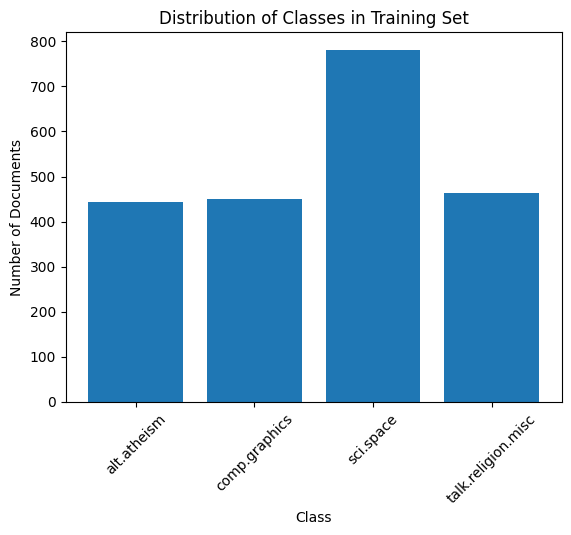

In [62]:
# Convert string labels in y_train to numerical labels using LabelEncoder
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
y_train_encoded = encoder.fit_transform(y_train)

# Display distribution of classes in the training set
class_distribution = np.bincount(y_train_encoded)

# Ensure that the number of ticks matches the number of labels
num_classes = len(newsgroups_train.target_names)  # Get the number of categories

plt.bar(range(num_classes), class_distribution[:num_classes])  # Limit distribution to the number of categories
plt.xticks(range(num_classes), newsgroups_train.target_names, rotation=45)  # Use the same range for xticks
plt.title('Distribution of Classes in Training Set')
plt.xlabel('Class')
plt.ylabel('Number of Documents')
plt.show()

In [63]:
# Data preprocessing
vectorizer = TfidfVectorizer(stop_words='english')
X_train = vectorizer.fit_transform(newsgroups_train.data)
X_test = vectorizer.transform(newsgroups_test.data)
y_train = newsgroups_train.target
y_test = newsgroups_test.target

In [64]:
# Initialize and train a Decision Tree classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [65]:
# Make predictions
y_pred = clf.predict(X_test)
# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=newsgroups_test.target_names))

Accuracy: 0.5890613451589062

Classification Report:
                     precision    recall  f1-score   support

       alt.atheism       0.48      0.42      0.45       319
     comp.graphics       0.64      0.80      0.71       389
         sci.space       0.72      0.62      0.67       394
talk.religion.misc       0.44      0.42      0.43       251

          accuracy                           0.59      1353
         macro avg       0.57      0.57      0.56      1353
      weighted avg       0.59      0.59      0.58      1353



In [66]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train a Random Forest classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Evaluate the model
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=newsgroups_test.target_names))


Classification Report:
                     precision    recall  f1-score   support

       alt.atheism       0.59      0.67      0.63       319
     comp.graphics       0.83      0.88      0.85       389
         sci.space       0.79      0.80      0.79       394
talk.religion.misc       0.56      0.41      0.47       251

          accuracy                           0.72      1353
         macro avg       0.69      0.69      0.69      1353
      weighted avg       0.71      0.72      0.71      1353



In [67]:
from sklearn.svm import SVC

# Initialize and train an SVM classifier
clf = SVC(kernel='linear', random_state=42)
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Evaluate the model
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=newsgroups_test.target_names))


Classification Report:
                     precision    recall  f1-score   support

       alt.atheism       0.65      0.61      0.63       319
     comp.graphics       0.89      0.89      0.89       389
         sci.space       0.76      0.89      0.82       394
talk.religion.misc       0.67      0.56      0.61       251

          accuracy                           0.76      1353
         macro avg       0.75      0.74      0.74      1353
      weighted avg       0.76      0.76      0.76      1353



Implementing Text Classification Model with Gradio


In [68]:
from transformers import pipeline

def load_model():
    return pipeline("sentiment-analysis", model="distilbert-base-uncased-finetuned-sst-2-english")

In [69]:
def classify_text(model, text):
    return model(text)

In [71]:
!pip install gradio
import gradio as gr

def main():
    model = load_model()
    interface = gr.Interface(
        fn=lambda text: classify_text(model, text),
        inputs=gr.Textbox(lines=2, placeholder="Enter Text Here..."),
        outputs="json",
        title="Text Classification with HuggingFace",
        description="This interface uses a HuggingFace model to classify text sentiments. Enter a sentence to see its classification."
    )
    interface.launch()

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.1/57.1 MB 9.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 320.1/320.1 kB 14.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.9/94.9 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.1/11.1 MB 55.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.2/73.2 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.8/63.8 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/130.2 kB 8.3 MB/s eta 0:00:00
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 3.0.2
    Uninstalling MarkupSafe-3.0.2:
      Successfully uninstalled MarkupSafe-3.0.2


In [1]:
import gradio as gr
from transformers import pipeline

def load_model():
    # Load a pre-trained HuggingFace pipeline for sentiment analysis
    model_pipeline = pipeline("sentiment-analysis", model="distilbert-base-uncased-finetuned-sst-2-english")
    return model_pipeline

def classify_text(model, text):
    # Use the loaded model to classify text
    result = model(text)
    return result

def main():
    # Load the model
    model = load_model()

    # Define the Gradio interface
    interface = gr.Interface(
        fn=lambda text: classify_text(model, text),
        inputs=gr.Textbox(lines=2, placeholder="Enter Text Here..."),
        outputs="json",
        title="Text Classification with HuggingFace",
        description="This interface uses a HuggingFace model to classify text sentiments. Enter a sentence to see its classification."
    )

    # Launch the Gradio app
    interface.launch()

if __name__ == "__main__":
    main()

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://2009804d13aba2bb36.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
